## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti. 

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**. 

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [334]:
#pip install deep-translator

In [416]:
import pandas as pd 
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
import re
import string
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
#from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


In [417]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [418]:
df= pd.read_csv('/content/drive/MyDrive/googleplaystore2.csv')


In [419]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,Creativity,"June 20, 2018",1.1,4.4 and up


In [420]:
df=df.drop(['App','Size','Genres','Last Updated','Current Ver','Android Ver','Unnamed: 13',], axis=1)

In [421]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Installs        10841 non-null  object 
 4   Type            10840 non-null  object 
 5   Price           10841 non-null  object 
 6   Content Rating  10840 non-null  object 
dtypes: float64(1), object(6)
memory usage: 593.0+ KB


In [423]:
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,Rating,1474,86.403468
1,Type,1,99.990776
2,Content Rating,1,99.990776
3,Category,0,100.000000
4,Reviews,0,100.000000
5,Installs,0,100.000000
6,Price,0,100.000000


In [424]:
imputar=list(completitud[completitud["completitud"]!= 100]["columna"].values)
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp.fit(df[imputar])
df[imputar]=imp.transform(df[imputar])


In [425]:
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,Category,0,100.0
1,Rating,0,100.0
2,Reviews,0,100.0
3,Installs,0,100.0
4,Type,0,100.0
5,Price,0,100.0
6,Content Rating,0,100.0


In [426]:
df.tail()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
10836,FAMILY,4.5,38,"5,000+",Free,0,Everyone
10837,FAMILY,5.0,4,100+,Free,0,Everyone
10838,MEDICAL,4.4,3,"1,000+",Free,0,Everyone
10839,BOOKS_AND_REFERENCE,4.5,114,"1,000+",Free,0,Mature 17+
10840,LIFESTYLE,4.5,398307,"10,000,000+",Free,0,Everyone


In [427]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [428]:
pd.value_counts(df['Category'])

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [429]:
df.sort_values('Category')

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
10472,1.9,19.0,3.0M,Free,0,Everyone,Everyone
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone
35,ART_AND_DESIGN,3.8,564,"100,000+",Free,0,Everyone
36,ART_AND_DESIGN,4.7,8145,"500,000+",Free,0,Everyone
37,ART_AND_DESIGN,4.1,36639,"5,000,000+",Free,0,Everyone
...,...,...,...,...,...,...,...
3645,WEATHER,3.7,26941,"5,000,000+",Free,0,Everyone
3646,WEATHER,4.2,7457,"1,000,000+",Free,0,Everyone
3647,WEATHER,3.9,135337,"5,000,000+",Free,0,Everyone
8291,WEATHER,4.2,189310,"10,000,000+",Free,0,Everyone


In [430]:
df=df.drop([10472])

In [431]:
df['Installs']=df.Installs.apply(lambda x: x.replace('+',''))
df['Installs']=df.Installs.apply(lambda x: x.replace(',',''))
df['Price']=df.Price.apply(lambda x: x.replace('$',''))

In [432]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen
4,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone


In [433]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [434]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [435]:
pd.value_counts(df['Content Rating'])

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [436]:
data = pd.get_dummies(data=df, columns=['Category','Type','Content Rating'])

In [437]:
X = data.drop('Rating', axis=1)
y = data['Rating']

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

In [439]:
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_train, y_train)

LinearRegression()

In [440]:
prediccion_y = modelo_LinReg.predict(X_test)

In [441]:
pd.DataFrame({'Realidad': y_test,
              'Prediccion': prediccion_y}).head()

,Realidad,Prediccion
6371,4.5,4.340537
6247,3.4,4.091079
2081,4.8,4.190599
8210,4.4,3.994418
6754,3.9,3.994442


In [442]:
modelo_LinReg.score(X_test,y_test)

0.004531800745103065

In [443]:
#error cuadratico medio
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = prediccion_y,
            squared = False
           )
print("")
print(f"El error cuadrático medio de test es: {rmse_ols}")


El error cuadrático medio de test es: 0.4811448104215851


In [ ]:
!pip install shap

In [446]:
import shap
from sklearn.ensemble import RandomForestRegressor

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [455]:
X_test=X_test.astype(np.float64)

In [456]:
y_pred = model.predict(X_test)
y_pred

array([4.424     , 4.626     , 4.02966667, ..., 4.25674643, 4.07      ,
       3.9965    ])

In [457]:
explainer = shap.Explainer(model.predict, X_test)

valores_shap = explainer(X_test)

Permutation explainer: 2169it [11:58,  3.00it/s]


In [458]:
from scipy.special import softmax
import numpy as np

def print_valores_shap(valores_shap, features) :

  importancias = []
  for i in range(valores_shap.values.shape[1]) :
    importancias.append(np.mean(np.abs(valores_shap.values[:, i])))
  
  importancias_normal = softmax(importancias)

  caracteristicas_importancias = {
      fea: imp for imp, fea in zip(importancias, features)
  }

  caracteristicas_importancias_normal = {
      fea: imp for imp, fea in zip(importancias_normal, features)
  }

  caracteristicas_importancias = {
      k: v for k, v in sorted(
          caracteristicas_importancias.items(), 
                              key=lambda item: item[1], reverse=True)
  }

  caracteristicas_importancias_normal = {
      k: v for k, v in sorted(
          caracteristicas_importancias_normal.items(), 
                              key=lambda item: item[1], reverse=True)
  }

  for k, v in caracteristicas_importancias.items() :
    print(f"{k} -> {v}:.4f(softmax={caracteristicas_importancias_normal[k]:.4f})")

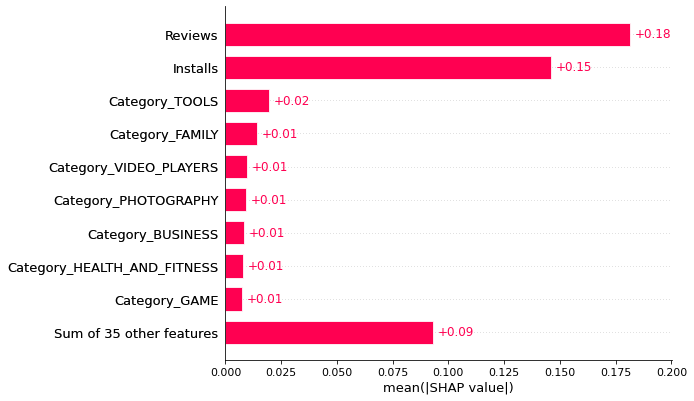

In [459]:
shap.plots.bar(valores_shap)

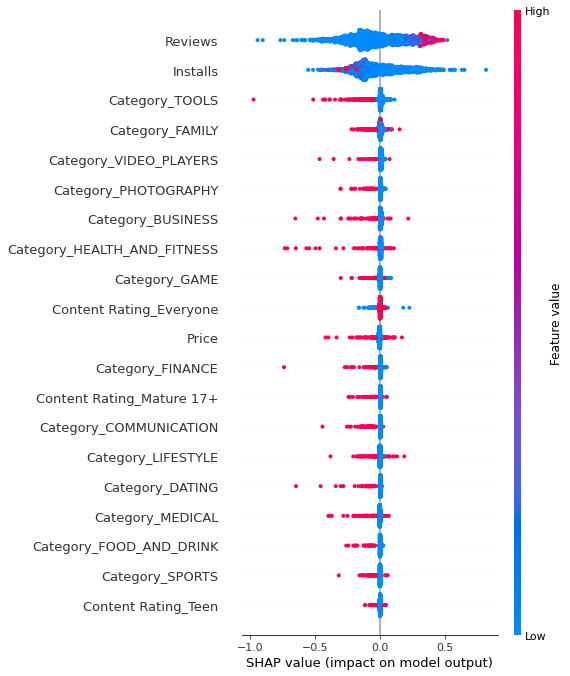

In [460]:
shap.summary_plot(valores_shap)

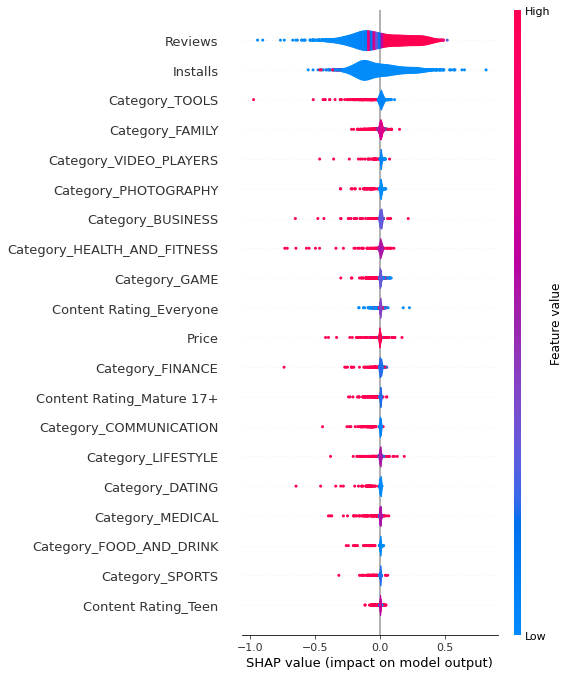

In [461]:
shap.summary_plot(valores_shap, plot_type='violin')